In [18]:
import kagglehub
import pandas as pd
import os
import json
from transformers import AutoTokenizer

path = kagglehub.dataset_download("tboyle10/medicaltranscriptions")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\spenc\.cache\kagglehub\datasets\tboyle10\medicaltranscriptions\versions\1


In [19]:
fileName = "mtsamples.csv"

df = pd.read_csv(path + "/" + fileName)

In [20]:
print("Dataframe info")
print(df.info())

print("-------------------------------------")

print("Dataframe stats")
print(df.describe())

print("-------------------------------------")

print("Dataframe dimensions")
print(df.shape)

print("-------------------------------------")

print(f"Dataframe")
df

Dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB
None
-------------------------------------
Dataframe stats
        Unnamed: 0
count  4999.000000
mean   2499.000000
std    1443.231328
min       0.000000
25%    1249.500000
50%    2499.000000
75%    3748.500000
max    4998.000000
-------------------------------------
Dataframe dimensions
(4999, 6)
-------------------------------------
Dataframe


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [21]:
encoded_df = df.dropna(subset=['transcription', 'keywords'])

encoded_df.drop('Unnamed: 0', axis=1, inplace=True)

specialty_counts = encoded_df['medical_specialty'].value_counts()

print(f"Number of specialties")
print(specialty_counts)

print("-------------------------------------")

print(f"Total specialties")
print(len(specialty_counts))

print("-------------------------------------")

print(f"Balance of top 5 classifications")
print(specialty_counts.nlargest(5))

print("-------------------------------------")

print(f"Balance of top 10 classifications")
print(specialty_counts.nlargest(10))

print("-------------------------------------")

print("Dataframe info")
print(encoded_df.info())

print("-------------------------------------")

encoded_df

Number of specialties
medical_specialty
Surgery                          1021
Orthopedic                        303
Cardiovascular / Pulmonary        280
Radiology                         251
Consult - History and Phy.        234
Gastroenterology                  195
Neurology                         168
General Medicine                  146
SOAP / Chart / Progress Notes     142
Urology                           140
Obstetrics / Gynecology           130
ENT - Otolaryngology               84
Neurosurgery                       81
Ophthalmology                      79
Discharge Summary                  77
Nephrology                         63
Hematology - Oncology              62
Pain Management                    58
Office Notes                       44
Pediatrics - Neonatal              42
Podiatry                           42
Emergency Room Reports             31
Dermatology                        25
Dentistry                          25
Cosmetic / Plastic Surgery         25
Letters   

C:\Users\spenc\AppData\Local\Temp\ipykernel_17484\3577090454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df.drop('Unnamed: 0', axis=1, inplace=True)


,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr..."
4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem..."
4989,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative str...","bariatrics, elective surgical weight loss, sur..."
4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"HISTORY:, A 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros..."


In [22]:
# Exclude surgery as that has a massive imbalance compared to the other classes
top_5_specialties = specialty_counts.nlargest(6).index[1:6]

reduced_encoded_df = encoded_df[encoded_df['medical_specialty'].isin(top_5_specialties)]

labels = reduced_encoded_df['medical_specialty'].unique()
label_to_id = {label: i for i, label in enumerate(labels)}
id_to_label = {int(i): label for i, label in enumerate(labels)}

specialty_data_label_mappings = {
    'label_to_id': label_to_id,
    'id_to_label': id_to_label
}

reduced_encoded_df['label'] = reduced_encoded_df['medical_specialty'].map(label_to_id)

# Reset index to be in order
reduced_encoded_df = reduced_encoded_df.reset_index(drop=True)

reduced_encoded_df 

C:\Users\spenc\AppData\Local\Temp\ipykernel_17484\3843038728.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_encoded_df['label'] = reduced_encoded_df['medical_specialty'].map(label_to_id)


,description,medical_specialty,sample_name,transcription,keywords,label
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0
1,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0
2,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram...",0
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,...",0
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler...",0
...,...,...,...,...,...,...
1258,"Left heart cath, selective coronary angiogram...",Cardiovascular / Pulmonary,Angiogram & StarClose Closure,"EXAM: , Left heart cath, selective coronary an...","cardiovascular / pulmonary, heart cath, select...",0
1259,Selective coronary angiography of the right c...,Cardiovascular / Pulmonary,Angiography & Catheterization - 1,"INDICATION:, Acute coronary syndrome.,CONSENT...","cardiovascular / pulmonary, acute coronary syn...",0
1260,A sample note on Angina.,Cardiovascular / Pulmonary,Angina,"ANGINA, is chest pain due to a lack of oxygen ...","cardiovascular / pulmonary, lack of oxygen, he...",0
1261,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,Adenosine Nuclear Scan,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","cardiovascular / pulmonary, adenosine nuclear ...",0


Max token length: 2420
Transcripts longer than 512 tokens: 684 out of 803752


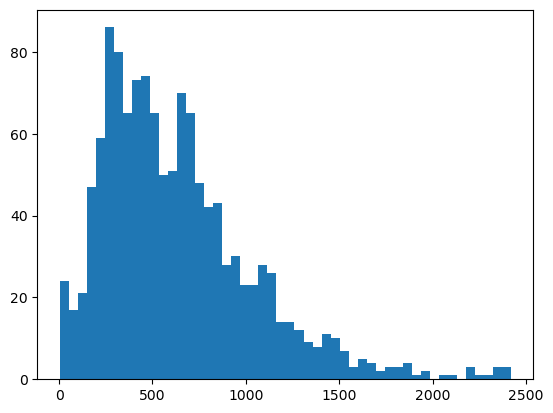

In [23]:
tokenizer = AutoTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')

# Get token lengths
reduced_encoded_df['token_length'] = reduced_encoded_df['transcription'].apply(
    lambda x: len(tokenizer.encode(x))
)

reduced_encoded_df['token_length'].hist(bins=50, grid=False)
print(f"Max token length: {reduced_encoded_df['token_length'].max()}")
print(f"Transcripts longer than 512 tokens: {(reduced_encoded_df['token_length'] > 512).sum()} out of {reduced_encoded_df['token_length'].sum()}")

In [24]:
# There is a lot of data that is over 512 tokens, maybe the end is more important than the middle

def create_smart_summary(transcription):
    token_ids = tokenizer.encode(transcription, add_special_tokens=False)

    if len(token_ids) <= 510:
        return transcription
    else:
        first_half_ids = token_ids[:(510 // 2)]
        second_half_ids = token_ids[-(510 // 2):]

        first_half_text = tokenizer.decode(first_half_ids)
        second_half_text = tokenizer.decode(second_half_ids)

        return first_half_text + " ... [TRUNCATED] ... " + second_half_text

reduced_encoded_df['transcription_summary'] = reduced_encoded_df['transcription'].apply(create_smart_summary)

reduced_encoded_df

,description,medical_specialty,sample_name,transcription,keywords,label,token_length,transcription_summary
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0,165,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
1,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0,395,1. The left ventricular cavity size and wall ...
2,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram...",0,183,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,...",0,152,"DESCRIPTION:,1. Normal cardiac chambers size...."
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler...",0,207,"2-D STUDY,1. Mild aortic stenosis, widely calc..."
...,...,...,...,...,...,...,...,...
1258,"Left heart cath, selective coronary angiogram...",Cardiovascular / Pulmonary,Angiogram & StarClose Closure,"EXAM: , Left heart cath, selective coronary an...","cardiovascular / pulmonary, heart cath, select...",0,474,"EXAM: , Left heart cath, selective coronary an..."
1259,Selective coronary angiography of the right c...,Cardiovascular / Pulmonary,Angiography & Catheterization - 1,"INDICATION:, Acute coronary syndrome.,CONSENT...","cardiovascular / pulmonary, acute coronary syn...",0,1359,"indication :, acute coronary syndrome., consen..."
1260,A sample note on Angina.,Cardiovascular / Pulmonary,Angina,"ANGINA, is chest pain due to a lack of oxygen ...","cardiovascular / pulmonary, lack of oxygen, he...",0,586,"angina, is chest pain due to a lack of oxygen ..."
1261,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,Adenosine Nuclear Scan,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","cardiovascular / pulmonary, adenosine nuclear ...",0,249,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden..."


In [25]:
DATA_DIRECTORY = '../Data/Specialty-Data'
DATA_OUTPUT_FILE = os.path.join(DATA_DIRECTORY, 'specialty_data.csv')
MAPPING_OUTPUT_FILE = os.path.join(DATA_DIRECTORY, 'specialty_data_label_mappings.json')

os.makedirs(DATA_DIRECTORY, exist_ok=True)

with open(MAPPING_OUTPUT_FILE, 'w') as f:
    json.dump(specialty_data_label_mappings, f, indent=4)

# Don't save the index in CSV, pandas reappends index for future applications
reduced_encoded_df.to_csv(DATA_OUTPUT_FILE, index=False)